In [1]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.0 MB/s eta 0:00:00


In [2]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.7 MB/s eta 0:00:00


In [30]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT

def deutsch_jozsa(oracle, n):
    # number of qubits = n (input) + 1 (output)
    qc = QuantumCircuit(n+1, n)

    # flip the control qubit
    qc.x(n)

    # hadamard all qubits
    qc.h(range(n+1))

    # oracle
    Uf = oracle(n)
    qc.append(Uf, range(n+1))

    qc.h(range(n))

    # if all measurements are 0 function is constant, else balanced
    qc.measure(range(n), range(n))

    return qc

def constant_oracle(n):
    oracle = QuantumCircuit(n + 1)
    # flip all qubits to 1
    oracle.x(range(n))
    return oracle.to_gate(label='Uf')

def balanced_oracle(n):
    oracle = QuantumCircuit(n + 1)
    # since qubits are already in superposition, this will flip half of the qubits
    for i in range(n):
      oracle.cx(i, n)
    return oracle.to_gate(label='Uf')

n = 3
qc_constant = deutsch_jozsa(constant_oracle, n)
qc_balanced = deutsch_jozsa(balanced_oracle, n)


In [24]:
qc_constant.draw()
qc_balanced.draw()

┌───┐     ┌─────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0    ├┤ H ├┤M├──────
     ├───┤     │     │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1    ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2    ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│     │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3    ├──────╫──╫──╫─
     └───┘└───┘└─────┘      ║  ║  ║ 
c: 3/═══════════════════════╩══╩══╩═
                            0  1  2

CPU times: user 47.8 ms, sys: 599 µs, total: 48.4 ms
Wall time: 48 ms


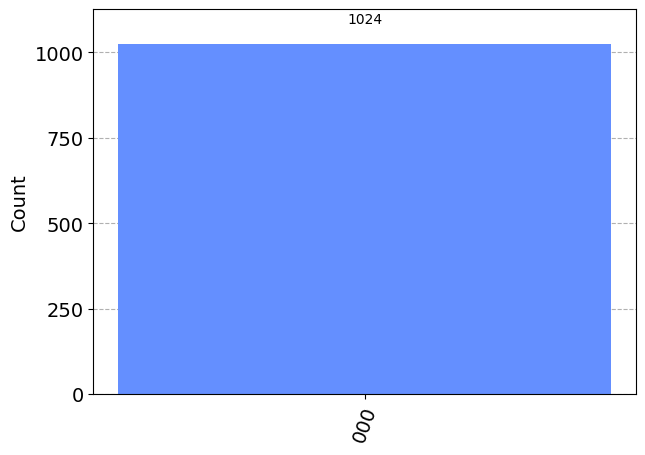

In [31]:
# execute the constant circuit on a simulator (no noise)
%%time
backend = Aer.get_backend('qasm_simulator')
result = execute(qc_constant, backend, shots=1024).result()
counts = result.get_counts(qc_constant)
plot_histogram(counts)

{'100': 13, '001': 9, '010': 19, '000': 983}


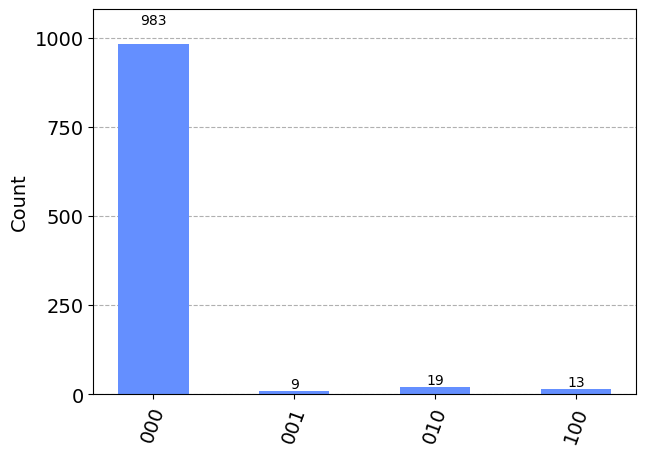

In [32]:
from qiskit.providers.fake_provider import FakeOslo
from qiskit_aer.noise import NoiseModel
backend = FakeOslo()
noise_model = NoiseModel.from_backend(backend)
coupling_map = backend.coupling_map
basis_gates = noise_model.basis_gates
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc_constant, simulator,noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result()
counts = result.get_counts(qc_constant)
print(counts)
plot_histogram(counts)

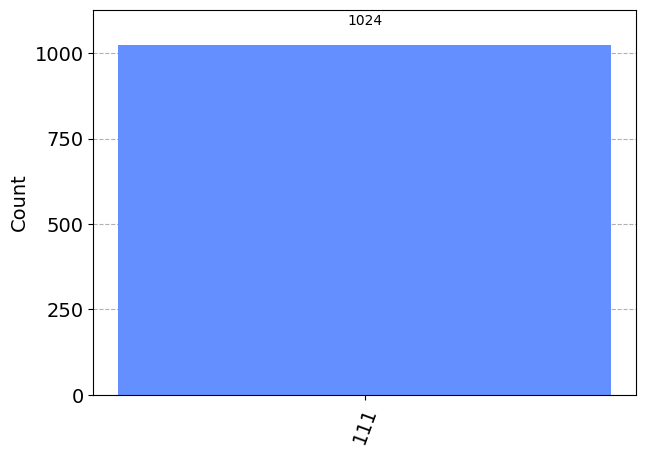

In [33]:
# execute the balanced circuit on a simulator (no noise)
backend = Aer.get_backend('qasm_simulator')
result = execute(qc_balanced, backend, shots=1024).result()
counts = result.get_counts(qc_balanced)
plot_histogram(counts)

{'001': 3, '110': 17, '101': 12, '011': 23, '111': 969}


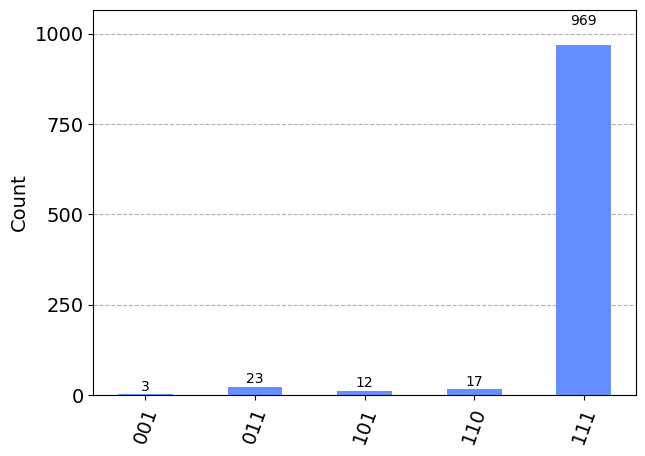

In [34]:
result = execute(qc_balanced, simulator,noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result()
counts = result.get_counts(qc_balanced)
print(counts)
plot_histogram(counts)